In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("historical-featured.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,ID,Venue,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,T2_AvgRunsScored,T2_AvgRunsConceded,T2_AvgWktsTaken,T2_AvgWktsLost,T2_AvgBound,T2_W/L,Winner
0,1,Africa,34,7.10,7.27,0.33,0.32,0.85,1.833,22,7.69,7.99,0.28,0.32,0.95,1.000,0
1,2,Oceania,36,8.01,7.38,0.35,0.33,0.98,1.400,30,7.56,7.70,0.32,0.32,0.93,1.142,0
2,3,Oceania,37,8.00,7.39,0.35,0.33,0.98,1.312,31,7.56,7.70,0.32,0.33,0.93,1.214,1
3,4,America,38,7.14,7.18,0.33,0.34,0.84,1.235,24,7.13,8.08,0.29,0.36,0.89,0.714,0
4,5,America,23,7.71,7.94,0.28,0.32,0.96,1.090,25,7.13,8.04,0.29,0.36,0.89,0.785,1


In [4]:
data.shape

(519, 17)

In [3]:
# train test split
train, test= train_test_split(data, test_size = 0.2, random_state = 100)

In [4]:
train.shape, test.shape

((415, 17), (104, 17))

In [5]:
train.columns

Index(['ID', 'Venue', 'T1_Mat', 'T1_AvgRunsScored', 'T1_AvgRunsConceded',
       'T1_AvgWktsTaken', 'T1_AvgWktsLost', 'T1_AvgBound', 'T1_W/L', 'T2_Mat',
       'T2_AvgRunsScored', 'T2_AvgRunsConceded', 'T2_AvgWktsTaken',
       'T2_AvgWktsLost', 'T2_AvgBound', 'T2_W/L', 'Winner'],
      dtype='object')

In [6]:
train.dtypes

ID                      int64
Venue                  object
T1_Mat                  int64
T1_AvgRunsScored      float64
T1_AvgRunsConceded    float64
T1_AvgWktsTaken       float64
T1_AvgWktsLost        float64
T1_AvgBound           float64
T1_W/L                float64
T2_Mat                  int64
T2_AvgRunsScored      float64
T2_AvgRunsConceded    float64
T2_AvgWktsTaken       float64
T2_AvgWktsLost        float64
T2_AvgBound           float64
T2_W/L                float64
Winner                  int64
dtype: object

In [7]:
num = train.select_dtypes(include='number')
num.columns

Index(['ID', 'T1_Mat', 'T1_AvgRunsScored', 'T1_AvgRunsConceded',
       'T1_AvgWktsTaken', 'T1_AvgWktsLost', 'T1_AvgBound', 'T1_W/L', 'T2_Mat',
       'T2_AvgRunsScored', 'T2_AvgRunsConceded', 'T2_AvgWktsTaken',
       'T2_AvgWktsLost', 'T2_AvgBound', 'T2_W/L', 'Winner'],
      dtype='object')

## Model training

In [21]:
xtrain = train.drop(['Winner', 'ID'],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner', 'ID' ],axis=1)  
ytest = test['Winner']

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((415, 15), (104, 15), (415,), (104,))

In [9]:
# nums = [   
#        'T1_Mat', 'T1_AvgRunsScored/Over',
#        'T1_AvgRunsConceded/Over', 'T1_Avg_Wkts_Taken', 'T1_Avg_Wkts_Lost',
#        'T1_Bound', 'T1_W/L', 'T2_Mat', 'T2_AvgRunsScored/Over',
#        'T2_AvgRunsConceded/Over', 'T2_Avg_Wkts_Taken', 'T2_Avg_Wkts_Lost',
#        'T2_Bound', 'T2_W/L'       
# ]

# cats = [ 'Venue',  'Winner']

# st = StandardScaler()
# xtrain[nums] = st.fit_transform(xtrain[nums])
# xtest[nums] = st.fit_transform(xtest[nums])

In [22]:
# Converting categorical features using OneHotEncoding method
encoded_xtrain = pd.get_dummies(data= xtrain, columns=[ 'Venue'])
encoded_xtest = pd.get_dummies(data= xtest, columns=['Venue' ])

encoded_xtrain.shape, encoded_xtest.shape

((415, 19), (104, 19))

In [26]:
m = xtrain['T1_Mat'].mean()

In [27]:
s = xtrain['T1_Mat'].std()

In [28]:
(92-m)/s

-0.04102903341092905

In [18]:
encoded_xtrain.tail()

,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,T2_AvgRunsScored,T2_AvgRunsConceded,T2_AvgWktsTaken,T2_AvgWktsLost,T2_AvgBound,T2_W/L,Venue_Africa,Venue_America,Venue_Asia,Venue_Europe,Venue_Oceania
228,92,7.55,7.60,0.33,0.30,0.92,1.300,43,6.66,8.04,0.26,0.39,0.81,0.194,1,0,0,0,0
280,111,7.09,7.14,0.32,0.33,0.84,1.413,93,7.45,7.87,0.32,0.35,0.91,0.897,0,0,1,0,0
53,51,7.84,7.35,0.34,0.33,0.95,1.318,52,6.89,7.04,0.33,0.35,0.80,1.260,0,0,1,0,0
350,115,8.02,7.66,0.33,0.32,0.99,1.211,110,7.93,8.10,0.31,0.33,1.01,1.115,0,0,0,1,0
79,53,7.26,7.29,0.32,0.32,0.87,1.523,46,6.93,7.28,0.30,0.33,0.84,1.190,0,0,1,0,0


In [19]:
xtrain.tail()

,Venue,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,T2_AvgRunsScored,T2_AvgRunsConceded,T2_AvgWktsTaken,T2_AvgWktsLost,T2_AvgBound,T2_W/L
228,Africa,92,7.55,7.60,0.33,0.30,0.92,1.300,43,6.66,8.04,0.26,0.39,0.81,0.194
280,Asia,111,7.09,7.14,0.32,0.33,0.84,1.413,93,7.45,7.87,0.32,0.35,0.91,0.897
53,Asia,51,7.84,7.35,0.34,0.33,0.95,1.318,52,6.89,7.04,0.33,0.35,0.80,1.260
350,Europe,115,8.02,7.66,0.33,0.32,0.99,1.211,110,7.93,8.10,0.31,0.33,1.01,1.115
79,Asia,53,7.26,7.29,0.32,0.32,0.87,1.523,46,6.93,7.28,0.30,0.33,0.84,1.190


In [34]:
xtrain.describe()

,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,T2_AvgRunsScored,T2_AvgRunsConceded,T2_AvgWktsTaken,T2_AvgWktsLost,T2_AvgBound,T2_W/L
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,93.501205,7.506217,7.592699,0.312988,0.316530,0.917084,1.301325,84.233735,7.328867,7.828072,0.298024,0.347422,0.902819,0.869361
std,36.588842,0.341293,0.262270,0.012692,0.025632,0.055742,0.252467,36.317186,0.425612,0.253373,0.022175,0.028059,0.067498,0.330343
min,23.000000,6.850000,6.960000,0.280000,0.270000,0.790000,0.677000,13.000000,6.060000,7.020000,0.240000,0.280000,0.680000,0.083000
25%,61.000000,7.225000,7.385000,0.310000,0.300000,0.870000,1.136000,55.500000,7.050000,7.710000,0.290000,0.330000,0.850000,0.740000
50%,92.000000,7.550000,7.660000,0.310000,0.320000,0.930000,1.280000,83.000000,7.330000,7.850000,0.300000,0.340000,0.910000,0.933000
75%,125.500000,7.800000,7.790000,0.320000,0.330000,0.960000,1.438500,113.000000,7.675000,8.000000,0.320000,0.360000,0.960000,1.117000
max,168.000000,8.040000,8.120000,0.350000,0.370000,1.040000,1.867000,157.000000,8.050000,8.410000,0.350000,0.460000,1.030000,1.421000


In [29]:
st = StandardScaler()
xtrain  = st.fit_transform(encoded_xtrain)
xtest = st.fit_transform(encoded_xtest)

In [31]:
xtrain_st[0]

array([-1.49135597,  1.38987521, -0.582923  ,  2.13076288,  0.52613914,
        0.95044062, -0.02904994, -1.46756933, -0.4678149 , -1.49395979,
        0.5407108 , -0.9784724 , -0.33847913,  1.04453419, -0.353074  ,
       -0.31748347,  0.94603233, -0.29391739, -0.48489076])

In [12]:
sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain,ytrain) 
 
xtrain_sm.shape, ytrain_sm.shape 

((486, 19), (486,))

## Logistic regression - with hyperparameter tuning

### Lasso penalty

In [339]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [349]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'penalty' : [   'l1'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1],
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits


In [350]:
log_clf_hyp.best_estimator_

LogisticRegression(C=1, max_iter=2000, penalty='l1', random_state=42,
                   solver='saga')

In [351]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report - logistice (l1) - train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report - logistice (l1) - train
              precision    recall  f1-score   support

           0       0.61      0.66      0.64       243
           1       0.63      0.58      0.60       243

    accuracy                           0.62       486
   macro avg       0.62      0.62      0.62       486
weighted avg       0.62      0.62      0.62       486

LogReg: ROC AUC =  61.9 %
LogReg: Precision =  63.1 %
LogReg: Recall =  57.6 %
LogReg: Accuracy =  61.9 %
LogReg: F1-Score =  60.2 %


array([[161,  82],
       [103, 140]], dtype=int64)

In [352]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report - logistic(l2)+SMOTE - test ')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report - logistic(l2)+SMOTE - test 
              precision    recall  f1-score   support

           0       0.53      0.59      0.56        49
           1       0.59      0.53      0.56        55

    accuracy                           0.56       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.56      0.56      0.56       104

LogReg: ROC AUC =  56.0 %
LogReg: Precision =  59.2 %
LogReg: Recall =  52.7 %
LogReg: Accuracy =  55.8 %
LogReg: F1-Score =  55.8 %


array([[29, 20],
       [26, 29]], dtype=int64)

In [344]:
# filename = 'LR-Lasso+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

### Ridge penalty

In [353]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'penalty' : [   'l2'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [  1e-2, 1e-1,1],
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 18 candidates, totalling 540 fits


In [354]:
log_clf_hyp.best_estimator_

LogisticRegression(C=1, max_iter=2000, random_state=42, solver='liblinear')

In [355]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report-logistic(l2)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(l2)+SMOTE-train
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       243
           1       0.63      0.60      0.61       243

    accuracy                           0.62       486
   macro avg       0.62      0.62      0.62       486
weighted avg       0.62      0.62      0.62       486

LogReg: ROC AUC =  62.1 %
LogReg: Precision =  62.8 %
LogReg: Recall =  59.7 %
LogReg: Accuracy =  62.1 %
LogReg: F1-Score =  61.2 %


array([[157,  86],
       [ 98, 145]], dtype=int64)

In [356]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report-logistic(l2)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(l2)+SMOTE-test
              precision    recall  f1-score   support

           0       0.54      0.59      0.56        49
           1       0.60      0.55      0.57        55

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104

LogReg: ROC AUC =  56.9 %
LogReg: Precision =  60.0 %
LogReg: Recall =  54.5 %
LogReg: Accuracy =  56.7 %
LogReg: F1-Score =  57.1 %


array([[29, 20],
       [25, 30]], dtype=int64)

In [357]:
# filename = 'LR-Ridge+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

### elasticnet

In [366]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'saga'],
    'penalty' : [   'elasticnet'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 10],
    'max_iter': [2000],
    'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 63 candidates, totalling 1890 fits


In [367]:
log_clf_hyp.best_estimator_

LogisticRegression(C=10, l1_ratio=0.1, max_iter=2000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [368]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report-logistic(enet)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(enet)+SMOTE-train
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       243
           1       0.63      0.60      0.61       243

    accuracy                           0.62       486
   macro avg       0.62      0.62      0.62       486
weighted avg       0.62      0.62      0.62       486

LogReg: ROC AUC =  62.3 %
LogReg: Precision =  62.9 %
LogReg: Recall =  60.1 %
LogReg: Accuracy =  62.3 %
LogReg: F1-Score =  61.5 %


array([[157,  86],
       [ 97, 146]], dtype=int64)

In [369]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report-logistic(enet)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(enet)+SMOTE-test
              precision    recall  f1-score   support

           0       0.54      0.59      0.56        49
           1       0.60      0.55      0.57        55

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104

LogReg: ROC AUC =  56.9 %
LogReg: Precision =  60.0 %
LogReg: Recall =  54.5 %
LogReg: Accuracy =  56.7 %
LogReg: F1-Score =  57.1 %


array([[29, 20],
       [25, 30]], dtype=int64)

In [370]:
# filename = 'LR-Enet+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

## SVM with hyperparameter tuning

### SVM

In [371]:
from sklearn.svm import SVC

In [424]:
# define model
model = SVC(random_state=42)

# define grid search
param_grid = [    
{'kernel' : ['poly', 'rbf'   ],
     'gamma' :['scale', 'auto' ],
    'C': [  1]
 
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0)
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


In [425]:
grid_search.best_estimator_

SVC(C=1, gamma='auto', random_state=42)

In [426]:
grid_search.best_params_, grid_search.best_score_

({'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, 0.5134483410352305)

In [427]:
# Predict the train data
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.66      0.75      0.70       243
           1       0.71      0.60      0.65       243

    accuracy                           0.68       486
   macro avg       0.68      0.68      0.68       486
weighted avg       0.68      0.68      0.68       486

 ROC AUC =  67.9 %
 Precision =  71.0 %
 Recall =  60.5 %
 Accuracy =  67.9 %
 F1-Score =  65.3 %


array([[183,  60],
       [ 96, 147]], dtype=int64)

In [429]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.57      0.67      0.62        49
           1       0.65      0.55      0.59        55

    accuracy                           0.61       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.61      0.60       104

 ROC AUC =  60.9 %
 Precision =  65.2 %
 Recall =  54.5 %
 Accuracy =  60.6 %
 F1-Score =  59.4 %


array([[33, 16],
       [25, 30]], dtype=int64)

In [428]:
# filename = 'SVM+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [42]:
pipe = Pipeline([
('classifier', KNeighborsClassifier())
])

In [84]:
parameters = { 
 'classifier__n_neighbors': [  10, 15, 17, 19, 21],
 'classifier__p': [1, 2],
 'classifier__leaf_size':   [1, 5, 10, 15],
 'classifier__weights': ['uniform'  ],
 'classifier__metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [85]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(pipe, parameters,verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0).fit(xtrain_sm  , ytrain_sm  )

Fitting 30 folds for each of 120 candidates, totalling 3600 fits


In [86]:
grid.best_estimator_

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(leaf_size=1, metric='manhattan',
                                      n_neighbors=19, p=1))])

In [87]:
grid.best_params_, grid.best_score_

({'classifier__leaf_size': 1,
  'classifier__metric': 'manhattan',
  'classifier__n_neighbors': 19,
  'classifier__p': 1,
  'classifier__weights': 'uniform'},
 0.5073912712773707)

In [88]:
y_predicted = grid.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.59      0.65      0.62       243
           1       0.61      0.55      0.58       243

    accuracy                           0.60       486
   macro avg       0.60      0.60      0.60       486
weighted avg       0.60      0.60      0.60       486

 ROC AUC =  59.9 %
 Precision =  61.0 %
 Recall =  54.7 %
 Accuracy =  59.9 %
 F1-Score =  57.7 %


array([[158,  85],
       [110, 133]], dtype=int64)

In [89]:
# Predict the test data
y_predicted = grid.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.54      0.65      0.59        49
           1       0.62      0.51      0.56        55

    accuracy                           0.58       104
   macro avg       0.58      0.58      0.58       104
weighted avg       0.58      0.58      0.58       104

Random Forest: ROC AUC =  58.1 %
Random Forest: Precision =  62.2 %
Random Forest: Recall =  50.9 %
Random Forest: Accuracy =  57.7 %
Random Forest: F1-Score =  56.0 %


array([[32, 17],
       [27, 28]], dtype=int64)

## GNB

In [124]:
import random

def set_random_seed(seed=100):
  np.random.seed(seed)
  random.seed(seed)
    
set_random_seed(100)

In [143]:
from sklearn.naive_bayes import GaussianNB

gnb_clf_hyp = GaussianNB(var_smoothing=10e-1 ) 
gnb_clf_hyp.fit(xtrain_sm, ytrain_sm)

GaussianNB(var_smoothing=1.0)

In [144]:
y_predicted = gnb_clf_hyp.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.58      0.74      0.65       243
           1       0.64      0.47      0.55       243

    accuracy                           0.60       486
   macro avg       0.61      0.60      0.60       486
weighted avg       0.61      0.60      0.60       486

 ROC AUC =  60.5 %
 Precision =  64.2 %
 Recall =  47.3 %
 Accuracy =  60.5 %
 F1-Score =  54.5 %


array([[179,  64],
       [128, 115]], dtype=int64)

In [145]:
# Predict the test data
y_predicted = gnb_clf_hyp.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.54      0.71      0.61        49
           1       0.64      0.45      0.53        55

    accuracy                           0.58       104
   macro avg       0.59      0.58      0.57       104
weighted avg       0.59      0.58      0.57       104

Random Forest: ROC AUC =  58.4 %
Random Forest: Precision =  64.1 %
Random Forest: Recall =  45.5 %
Random Forest: Accuracy =  57.7 %
Random Forest: F1-Score =  53.2 %


array([[35, 14],
       [30, 25]], dtype=int64)

## Random Forest

## random forest - with hyperparameter tuning

In [13]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV # For optimization

In [15]:
# # define models and parameters
# model = RandomForestClassifier(random_state=42)
# param_grid = [    
#     {'n_estimators' : [2000],
#     'criterion': ['gini', 'entropy'],
#     'max_features':['auto', 'sqrt', 0.2, 0.4],
#      'min_samples_leaf': [50 ],
#      'oob_score':[True],
#      'min_samples_split':[6]
#     }
# ]
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid= param_grid, n_jobs=-1,  cv=cv, scoring='f1',error_score='raise')
# grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

In [16]:
# define models and parameters
model = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [2000],
    'criterion': ['gini' ],
    'max_features':[ 0.2],
     'min_samples_leaf': [50 ],
     'oob_score':[True],
     'min_samples_split':[6]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, n_jobs=-1,  cv=cv, scoring='f1',error_score='raise')
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

In [17]:
grid_search.best_estimator_

RandomForestClassifier(max_features=0.2, min_samples_leaf=50,
                       min_samples_split=6, n_estimators=2000, oob_score=True,
                       random_state=42)

In [18]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_features': 0.2,
  'min_samples_leaf': 50,
  'min_samples_split': 6,
  'n_estimators': 2000,
  'oob_score': True},
 0.5686278140517126)

In [19]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.63      0.69      0.66       243
           1       0.66      0.60      0.63       243

    accuracy                           0.65       486
   macro avg       0.65      0.65      0.65       486
weighted avg       0.65      0.65      0.65       486

 ROC AUC =  64.6 %
 Precision =  66.1 %
 Recall =  60.1 %
 Accuracy =  64.6 %
 F1-Score =  62.9 %


array([[168,  75],
       [ 97, 146]], dtype=int64)

In [20]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.58      0.67      0.62        49
           1       0.66      0.56      0.61        55

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.62      0.62      0.61       104

Random Forest: ROC AUC =  61.9 %
Random Forest: Precision =  66.0 %
Random Forest: Recall =  56.4 %
Random Forest: Accuracy =  61.5 %
Random Forest: F1-Score =  60.8 %


array([[33, 16],
       [24, 31]], dtype=int64)

In [460]:
# filename = 'RF+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

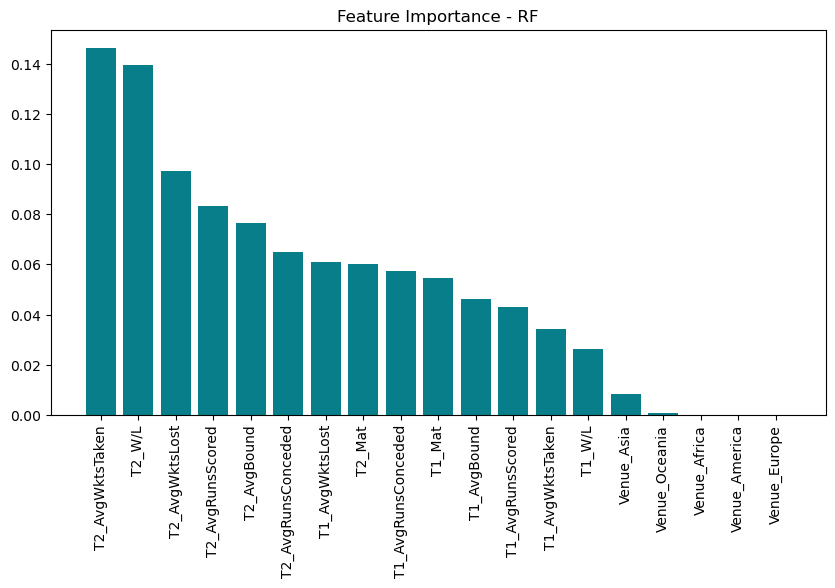

In [21]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - RF')
plt.xticks(rotation='vertical')
plt.show()

## BOOSTING

## Gradient Boosting With XGBoost

In [22]:
import xgboost as xgb

In [23]:
model = xgb.XGBClassifier(seed = 42)
param_grid = [    
    {'learning_rate' :[1e-6],# 8
    'n_estimators':[2000],
 'max_depth':[2], #2
 'min_child_weight':[1],
 'gamma':[0],
 'subsample':[   0.4 ], #0.4
 'colsample_bytree':[  0.55 ], #0.45
 'objective': ['binary:logistic'],
 'nthread':[4],
 'scale_pos_weight':[1],
 'reg_alpha':[1e-5 ]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid,  cv=cv, n_jobs = -1, scoring='f1',error_score='raise', verbose=0 )
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)
#,colsample_bytree':[ 0.1, 0.2 ]

In [24]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.55,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1e-06, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [25]:
grid_search.best_params_, grid_search.best_score_

({'colsample_bytree': 0.55,
  'gamma': 0,
  'learning_rate': 1e-06,
  'max_depth': 2,
  'min_child_weight': 1,
  'n_estimators': 2000,
  'nthread': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1e-05,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.5466691969304031)

In [26]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.62      0.71      0.66       243
           1       0.66      0.57      0.61       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

 ROC AUC =  64.0 %
 Precision =  66.2 %
 Recall =  57.2 %
 Accuracy =  64.0 %
 F1-Score =  61.4 %


array([[172,  71],
       [104, 139]], dtype=int64)

In [27]:
# Predict the test data
y_predicted = grid_search.predict( xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.57      0.65      0.61        49
           1       0.65      0.56      0.60        55

    accuracy                           0.61       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.61      0.61       104

Random Forest: ROC AUC =  60.8 %
Random Forest: Precision =  64.6 %
Random Forest: Recall =  56.4 %
Random Forest: Accuracy =  60.6 %
Random Forest: F1-Score =  60.2 %


array([[32, 17],
       [24, 31]], dtype=int64)

In [468]:
# filename = 'XGBoost+SMOTE-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

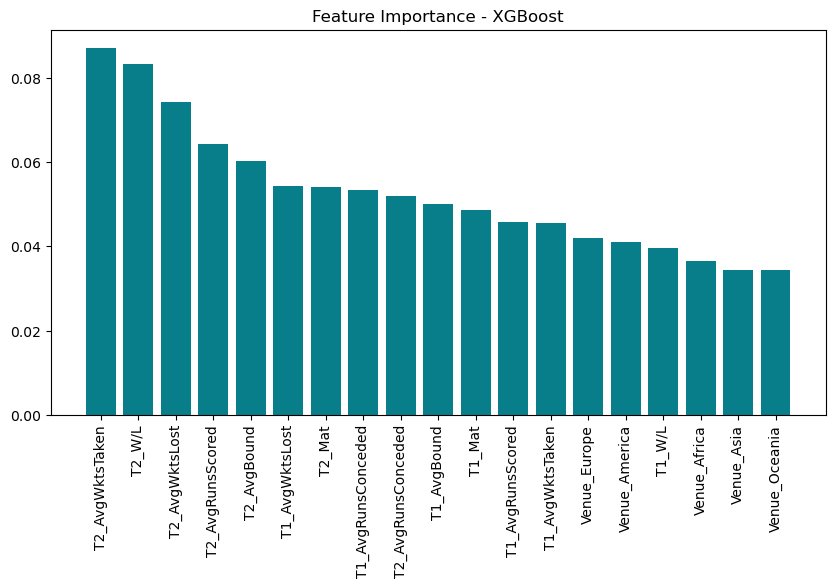

In [28]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation='vertical')
plt.show()

## RF-Venue

In [470]:
xtrain = train.drop(['Winner', 'ID', 'Venue'],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner', 'ID', 'Venue' ],axis=1)  
ytest = test['Winner']

st = StandardScaler()
xtrain_st  = st.fit_transform( xtrain)
xtest_st = st.fit_transform( xtest)

sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain_st,ytrain) 


In [471]:
# define models and parameters
model = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [2000],
    'criterion': ['gini', 'entropy'],
    'max_features':[ 0.2 ],
     'min_samples_leaf': [ 50 ], #50
     'oob_score':[True],
     'min_samples_split':[6]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, n_jobs=-1,  cv=cv, scoring='f1',error_score='raise')
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

In [472]:
grid_search.best_estimator_

RandomForestClassifier(max_features=0.2, min_samples_leaf=50,
                       min_samples_split=6, n_estimators=2000, oob_score=True,
                       random_state=42)

In [473]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_features': 0.2,
  'min_samples_leaf': 50,
  'min_samples_split': 6,
  'n_estimators': 2000,
  'oob_score': True},
 0.5808744447036189)

In [474]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.63      0.69      0.66       243
           1       0.66      0.60      0.62       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

 ROC AUC =  64.2 %
 Precision =  65.6 %
 Recall =  59.7 %
 Accuracy =  64.2 %
 F1-Score =  62.5 %


array([[167,  76],
       [ 98, 145]], dtype=int64)

In [481]:
# Predict the test data
y_predicted = grid_search.predict( xtest_st)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.57      0.63      0.60        49
           1       0.64      0.58      0.61        55

    accuracy                           0.61       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.61      0.61       104

Random Forest: ROC AUC =  60.7 %
Random Forest: Precision =  64.0 %
Random Forest: Recall =  58.2 %
Random Forest: Accuracy =  60.6 %
Random Forest: F1-Score =  61.0 %


array([[31, 18],
       [23, 32]], dtype=int64)

In [476]:
# filename = 'RF+SMOTE-Venue-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

## XGBoost-Venue

In [29]:
xtrain = train.drop(['Winner', 'ID', 'Venue'],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner', 'ID', 'Venue' ],axis=1)  
ytest = test['Winner']

st = StandardScaler()
xtrain_st  = st.fit_transform( xtrain)
xtest_st = st.fit_transform( xtest)

sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain_st,ytrain) 

In [30]:
model = xgb.XGBClassifier(seed=42)

param_grid = [    
    {'learning_rate' :[1e-6],# 8
    'n_estimators':[2000],
 'max_depth':[2], #2
 'min_child_weight':[1],
 'gamma':[0],
 'subsample':[   0.4 ], #0.4
 'colsample_bytree':[  0.45 ], #0.45
 'objective': ['binary:logistic'],
 'nthread':[4],
 'scale_pos_weight':[1],
 'reg_alpha':[1e-5 ]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid,  cv=cv, n_jobs = -1, scoring='f1',error_score='raise' )
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

In [31]:
grid_search.best_params_, grid_search.best_score_

({'colsample_bytree': 0.45,
  'gamma': 0,
  'learning_rate': 1e-06,
  'max_depth': 2,
  'min_child_weight': 1,
  'n_estimators': 2000,
  'nthread': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1e-05,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.5682348984776888)

In [32]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.63      0.71      0.67       243
           1       0.67      0.59      0.63       243

    accuracy                           0.65       486
   macro avg       0.65      0.65      0.65       486
weighted avg       0.65      0.65      0.65       486

 ROC AUC =  65.0 %
 Precision =  67.0 %
 Recall =  59.3 %
 Accuracy =  65.0 %
 F1-Score =  62.9 %


array([[172,  71],
       [ 99, 144]], dtype=int64)

In [33]:
# Predict the test data
y_predicted = grid_search.predict( xtest_st)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.58      0.61      0.59        49
           1       0.63      0.60      0.62        55

    accuracy                           0.61       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.61      0.61       104

Random Forest: ROC AUC =  60.6 %
Random Forest: Precision =  63.5 %
Random Forest: Recall =  60.0 %
Random Forest: Accuracy =  60.6 %
Random Forest: F1-Score =  61.7 %


array([[30, 19],
       [22, 33]], dtype=int64)

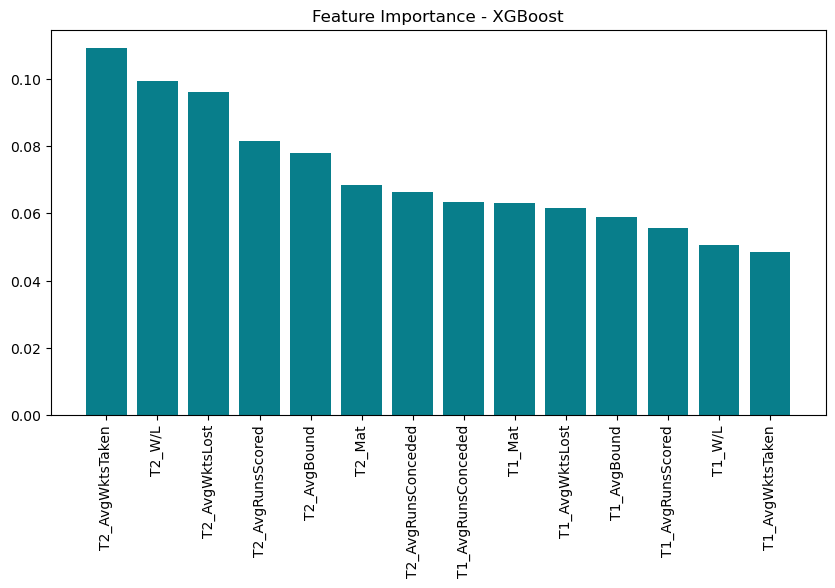

In [35]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': xtrain.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation='vertical')
plt.show()

In [487]:
# filename = 'XGBoost+SMOTE-Venue-New.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

<AxesSubplot:title={'center':'Model+SMOTE'}, xlabel='Model'>

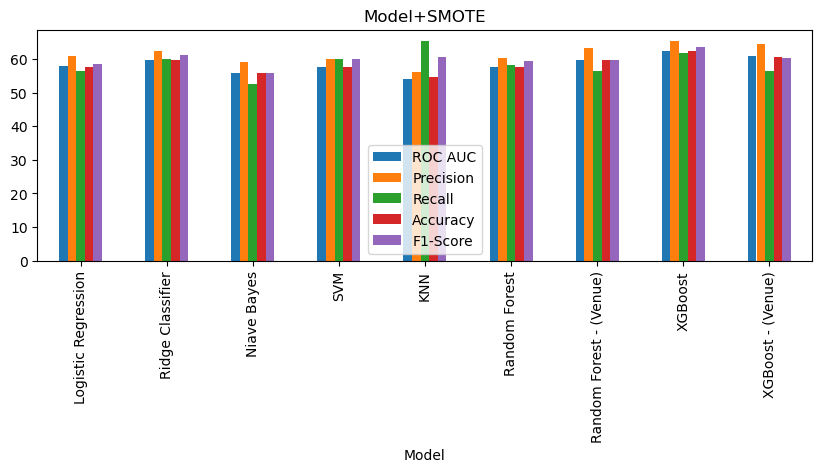

In [689]:
df = pd.DataFrame([['Logistic Regression', 57.8, 60.8, 56.4, 57.7, 58.5], 
                   ['Ridge Classifier', 59.6, 62.3, 60.0, 59.6, 61.1], 
                   ['Niave Bayes', 56.0, 59.2, 52.7, 55.8, 55.8],
                   ['SVM', 57.6, 60.0, 60.0, 57.7, 60.0], 
                   ['KNN', 54.2, 56.2, 65.5, 54.8, 60.5], 
                   ['Random Forest', 57.7, 60.4, 58.2, 57.7, 59.3],
                   ['Random Forest - (Venue)', 59.8, 63.3, 56.4, 59.6, 59.6], 
                   ['XGBoost', 62.5, 65.4, 61.8, 62.5, 63.6], 
                   ['XGBoost - (Venue)', 60.8, 64.6, 56.4, 60.6, 60.2]],
                  columns=['Model', 'ROC AUC', 'Precision', 'Recall', 'Accuracy', 'F1-Score'])
 
 
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Model+SMOTE',
        figsize=(10,3),
        )